# Exploratory Data Analysis

## 1. Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## 2. Import the dataset

In [3]:
df = pd.read_csv("song_dataset.csv")
df.head()

,user,song,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1,Nothing from Nothing,To Die For,Billy Preston,1974
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1,Under Cold Blue Stars,Under Cold Blue Stars,Josh Rouse,2002
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1,Riot Radio (Soundtrack Version),Nick & Norah's Infinite Playlist - Original Mo...,The Dead 60s,0


In [4]:
len(df)

102627

In [5]:
df[["user", "song", "artist_name"]].nunique()

user            2042
song           44458
artist_name    11928
dtype: int64

## 3. Most listened songs

In [6]:
songs_count_df = df[["song", "title", "artist_name", "play_count"]].groupby(by=["song", "title", "artist_name"]).sum().sort_values(by="play_count", ascending=False)
songs_count_df.head()

,,,play_count
song,title,artist_name,
SOFRRFT12A8C140C5C,Words,Jack the Ripper,1890
SOBONKR12A58A7A7E0,You're The One,Dwight Yoakam,1689
SOSXLTC12AF72A7F54,Revelry,Kings Of Leon,1490
SOAUWYT12A81C206F1,Undo,Björk,1443
SOEGIYH12A6D4FC0E3,Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile),Barry Tuckwell/Academy of St Martin-in-the-Fields/Sir Neville Marriner,921


## 4. Most listened artists

In [7]:
artist_count_df = df[["artist_name", "play_count"]].groupby(by=["artist_name"]).sum().sort_values(by="play_count", ascending=False)
artist_count_df.head()

,play_count
artist_name,
Kings Of Leon,2765
The Black Keys,1912
Jack the Ripper,1890
Coldplay,1830
Dwight Yoakam,1705


## 5. User activity

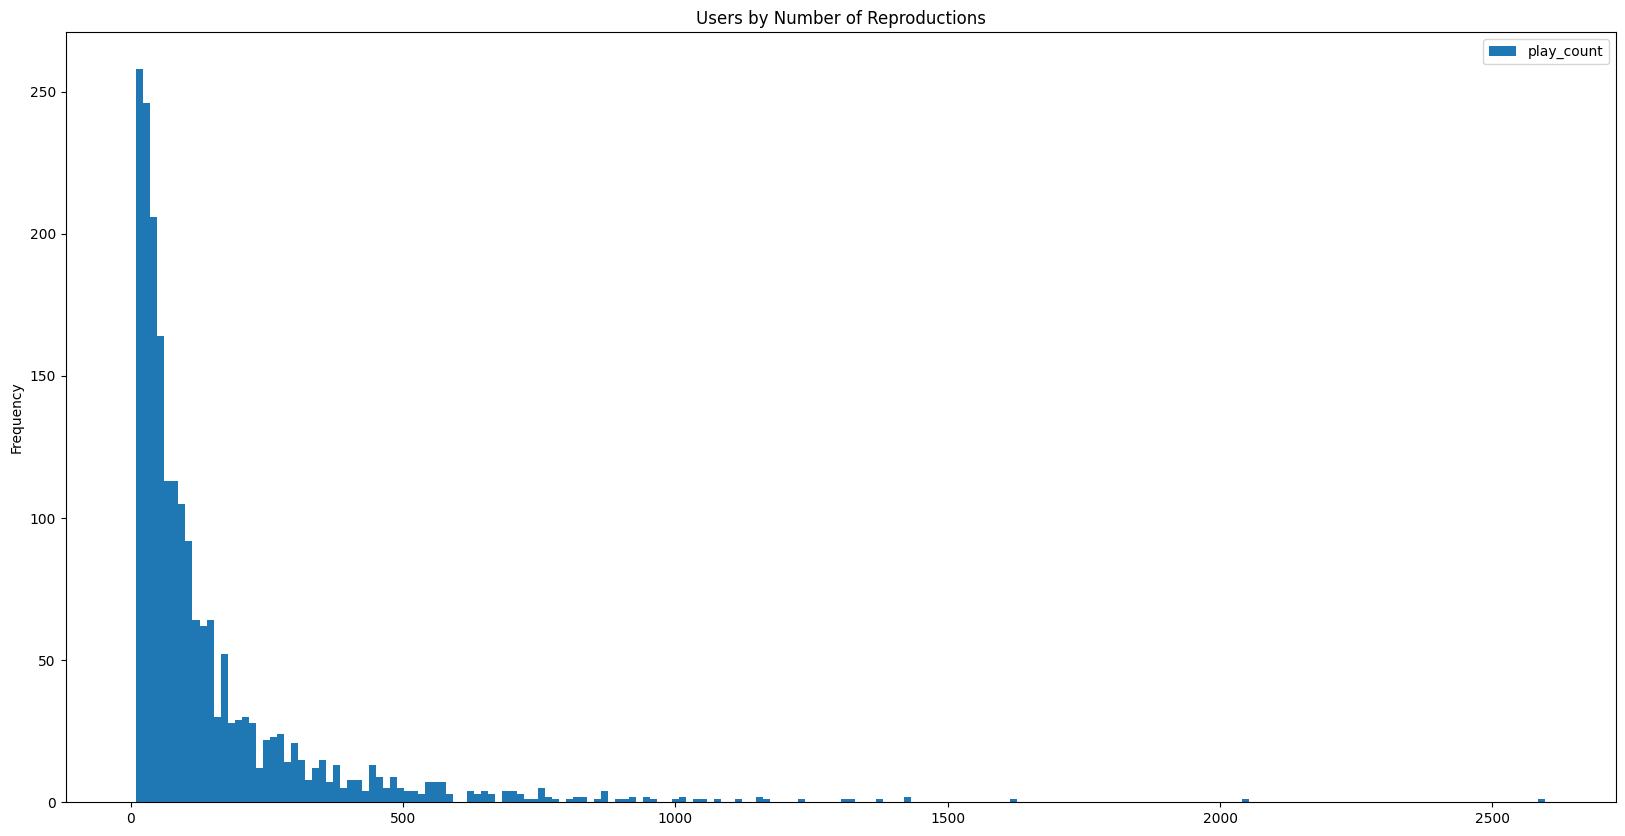

In [8]:
user_activity_df = df[["user", "play_count"]].groupby("user").sum()
ax = user_activity_df.plot(
    kind="hist",
    figsize=(20,10),
    bins=200,
    title="Users by Number of Reproductions",
)

In [9]:
user_activity_df.describe()

,play_count
count,2042.000000
mean,145.034280
std,196.394275
min,10.000000
25%,36.000000
50%,78.000000
75%,168.000000
max,2597.000000


## 6. Users by distinct songs played

<AxesSubplot: title={'center': 'Users by Number of Songs Listened'}, ylabel='Frequency'>

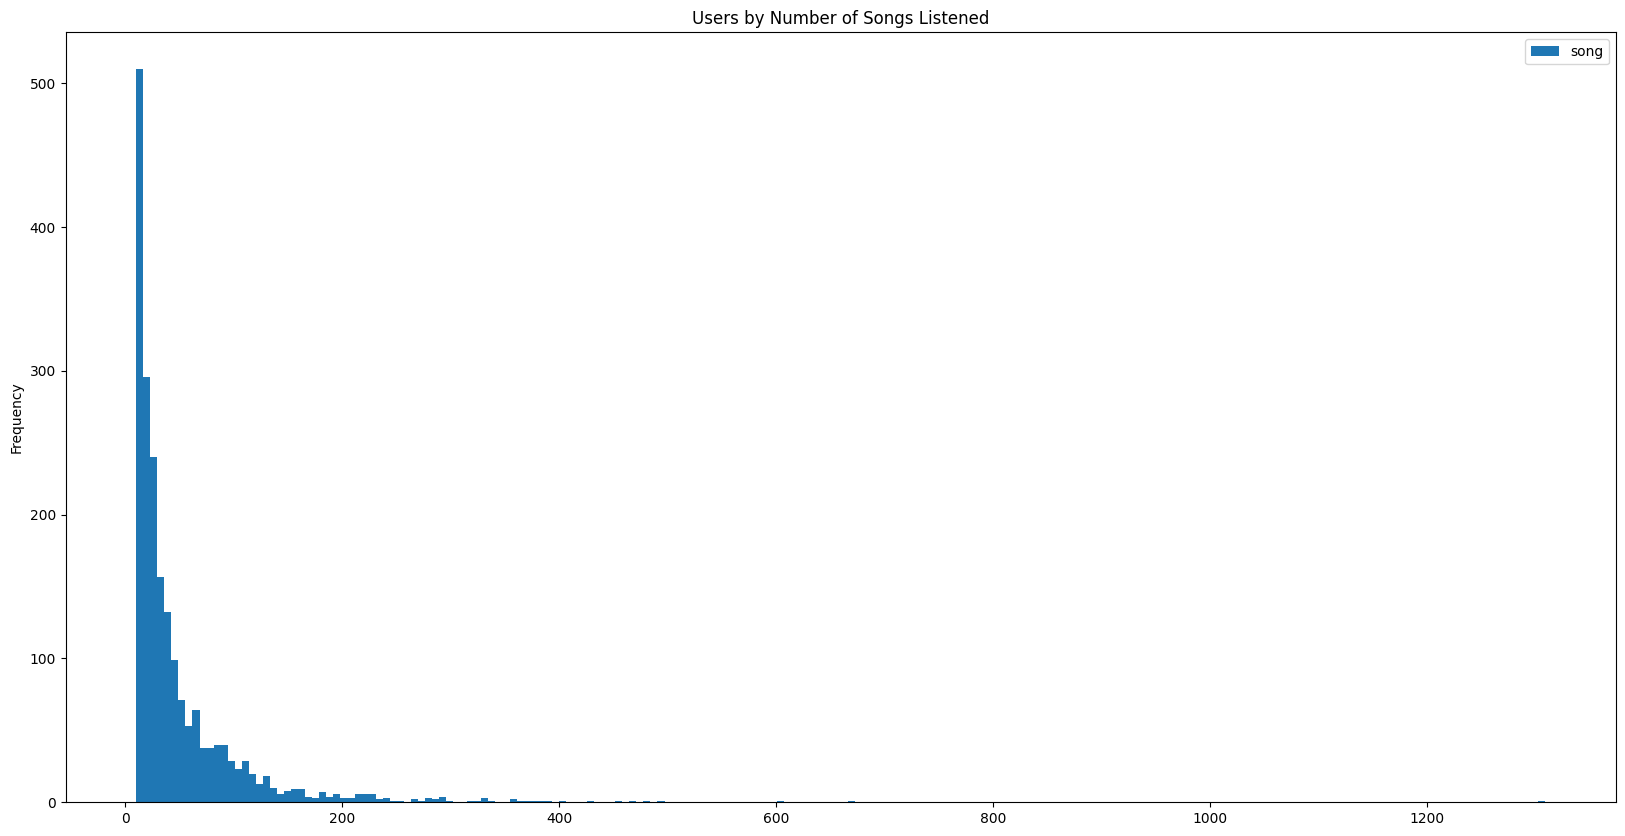

In [10]:
user_songs_df = df[["user", "song"]].groupby("user").count()
user_songs_df.plot(
    kind="hist",
    figsize=(20,10),
    bins=200,
    title="Users by Number of Songs Listened",
)

In [11]:
user_songs_df.describe()

,song
count,2042.000000
mean,50.258080
std,65.800267
min,10.000000
25%,17.000000
50%,29.000000
75%,58.000000
max,1309.000000


## 7. Song distribution

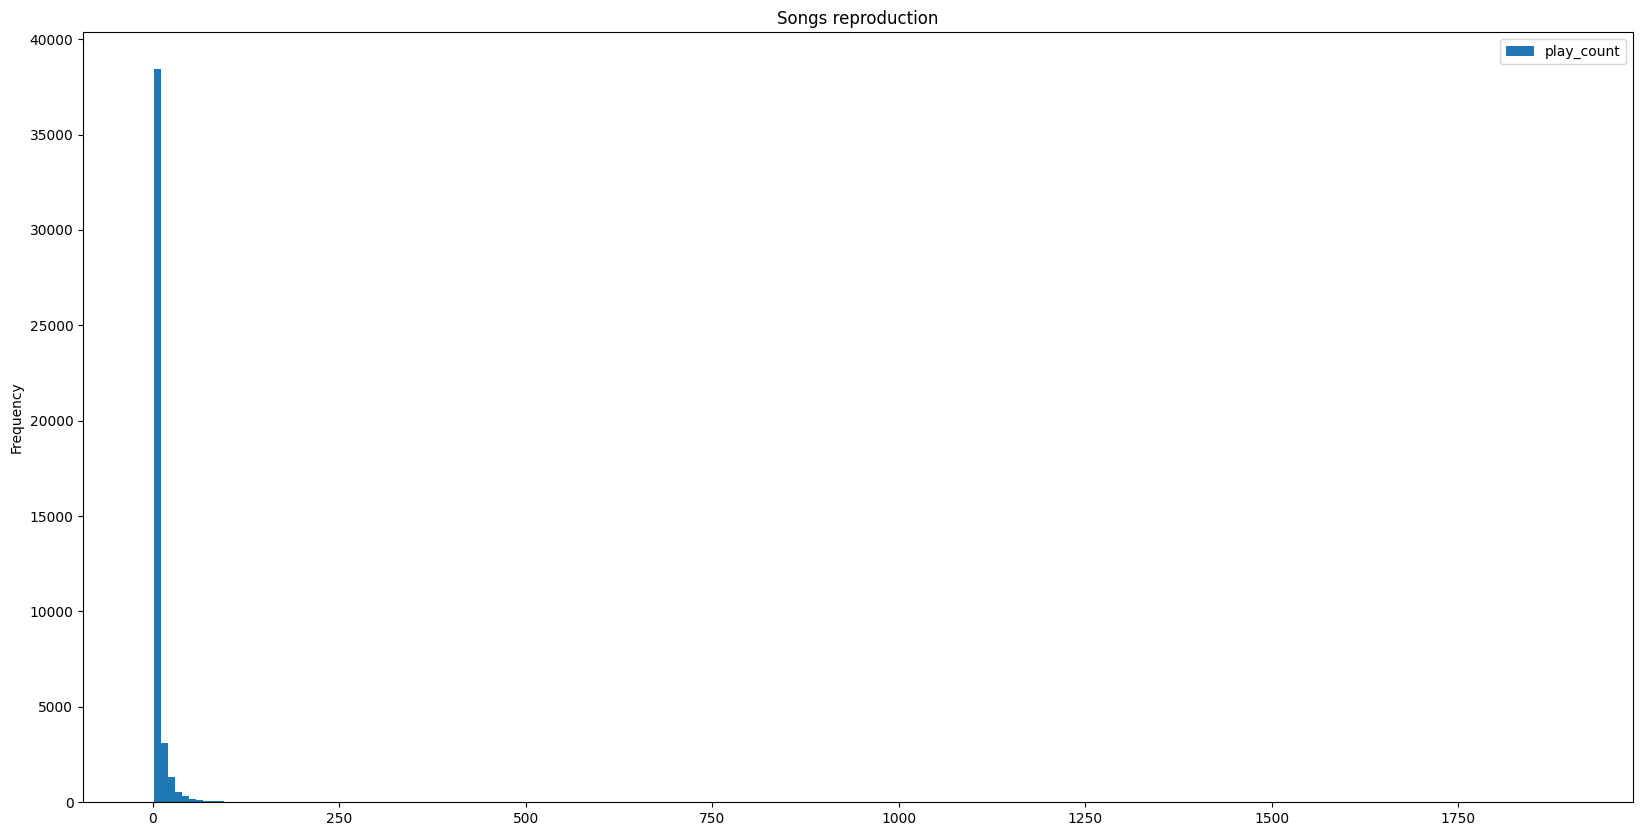

In [12]:
song_dist_df = df[["song", "play_count"]].groupby("song").sum()
ax = song_dist_df.plot(
    kind="hist",
    figsize=(20,10),
    bins=200,
    title="Songs reproduction",
)

In [13]:
song_dist_df.describe()

,play_count
count,44458.000000
mean,6.661568
std,24.311012
min,1.000000
25%,1.000000
50%,2.000000
75%,6.000000
max,1890.000000


## 8. Percentage of songs listened only once

In [14]:
len(song_dist_df[song_dist_df["play_count"] <= 1])/len(song_dist_df)

0.38899635611138605

## 9. Song by unique listeners

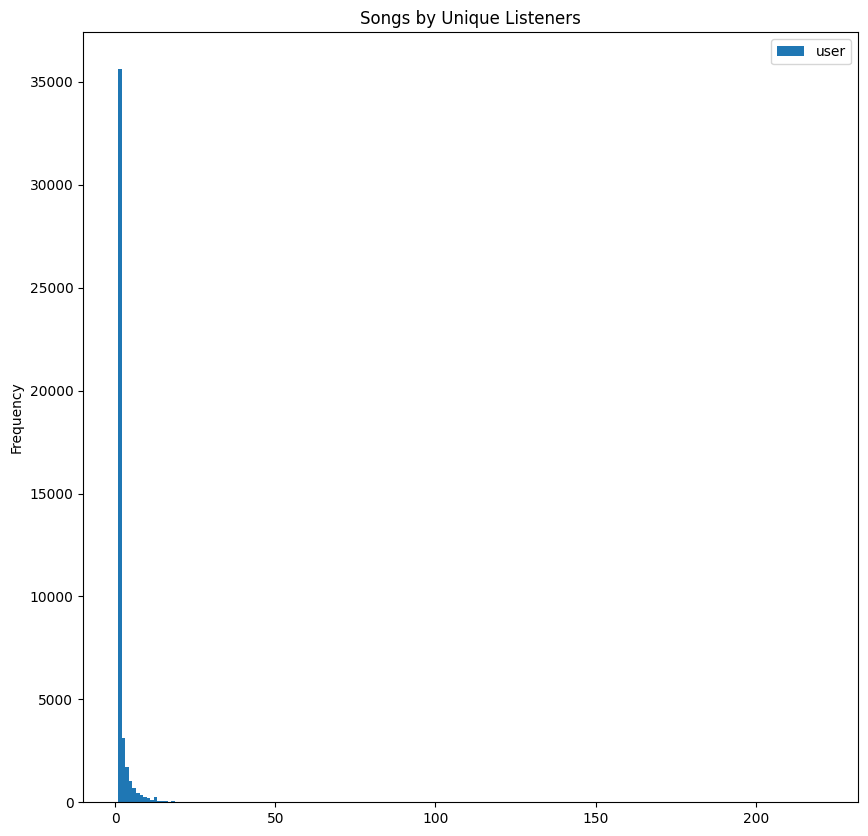

In [15]:
song_unique_user_df = df[["song", "user"]].groupby("song").count()
ax = song_unique_user_df.plot(
    kind="hist",
    figsize=(10,10),
    bins=200,
    title="Songs by Unique Listeners",
)

In [16]:
song_unique_user_df.describe()

,user
count,44458.000000
mean,2.308403
std,5.075990
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,221.000000


## 8. Percentage of songs listened only by one user

In [17]:
len(song_unique_user_df[song_unique_user_df["user"] <= 1])/len(song_unique_user_df)

0.6290656349813307

## 9. Albums by number of users who have listened to all their tracks

In [64]:
# amount of EP + LP
# that means that the release must have at least 4 tracks

df["artist+release"] = df["artist_name"] + "_" + df["release"]
releases_df = df.groupby(by=["artist+release", "song"]).count().reset_index().groupby(by=["artist+release"]).count().sort_values("song", ascending=False)
albums = releases_df.loc[releases_df.song >= 4].reset_index()
len(albums)

2860

array([[<AxesSubplot: title={'center': 'user'}>]], dtype=object)

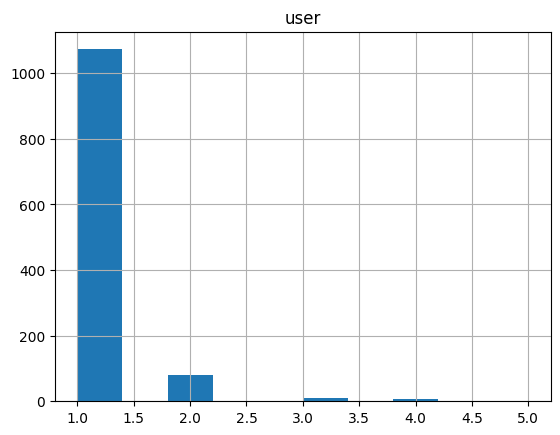

In [82]:
album_user_df = df.groupby(by=["artist+release", "user"]).count().sort_values("play_count", ascending=False).reset_index()
album_user_df = album_user_df.loc[album_user_df["artist+release"].isin(albums["artist+release"])]
# keep only users who listened to all the songs in the album
album_user_df = album_user_df.merge(albums[["artist+release", "song"]])
# count those users
album_user_df = album_user_df.groupby("artist+release").count().reset_index()
album_user_df = album_user_df[["artist+release", "user"]]
album_user_df.hist()